In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
df_4 = pd.read_csv("Q1_data.csv")
df_4.head()

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10


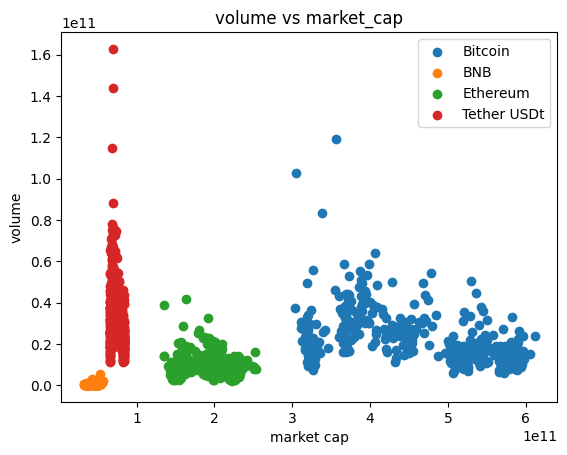

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
coin_names = list(df_4['name'].value_counts().keys())
for coin in coin_names : 
    msk = df_4['name'] == coin
    plt.scatter(df_4[msk]['market_cap'] , df_4[msk]['volume'] , label = coin)
plt.xlabel("market cap")
plt.ylabel("volume")
plt.title("volume vs market_cap")
plt.legend()
plt.show()

In [41]:
X = np.asanyarray(df_4[['market_cap' , 'volume']])

C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[5.44479225e+11 1.71794734e+10]
 [7.47526885e+10 3.31651327e+10]
 [1.96251675e+11 8.76098756e+09]
 [4.45996615e+10 6.80796582e+08]
 [3.74621528e+11 2.86925418e+10]]


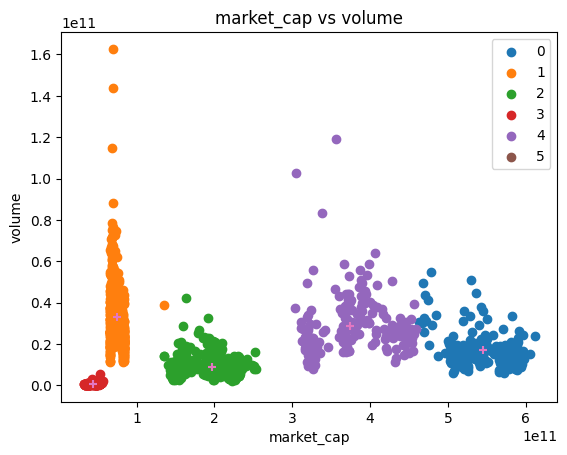

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print(kmeans.cluster_centers_)
y_pred = kmeans.predict(X)
for i in range(0,6) : 
    msk = y_pred == i 
    cluster_X = X[y_pred == i ]
    plt.scatter(cluster_X[:,0] , cluster_X[:,1] , label = i )
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , marker = '+')
plt.xlabel("market_cap")
plt.ylabel("volume")
plt.title("market_cap vs volume")
plt.legend()
plt.show()

In [58]:
max_k = 10
loss_k = []
for k in range(1,max_k+1) : 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    loss = 0
    for i in range(0,k) : 
        msk = y_pred == i
        cluster = X[msk]
        center = kmeans.cluster_centers_[i]
        for j in range(len(cluster)) : 
            loss += (cluster[j,0] - center[0])**2 + (cluster[j,1] - center[1])**2
    loss_k.append(loss)

C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

10


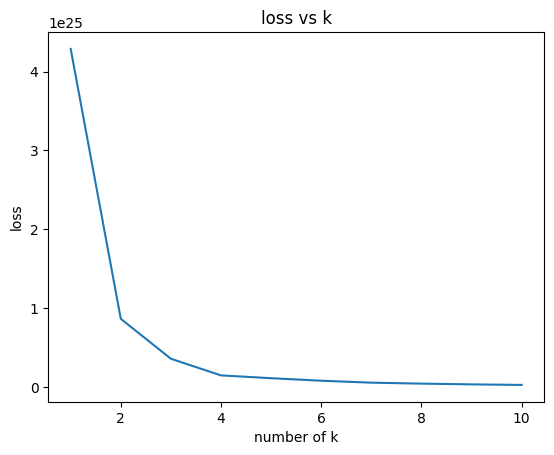

In [60]:
print(len(loss_k))
plt.plot([i for i in range(1,max_k+1)] , loss_k , '-')
plt.xlabel("number of k")
plt.ylabel("loss")
plt.title("loss vs k")
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_s = sc.fit_transform(X)

In [84]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.25 , min_samples = 5)
y_pred = db.fit_predict(x_s)

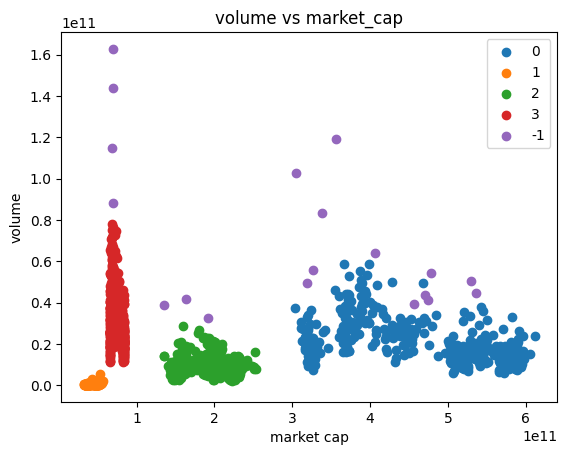

In [93]:
clusters = pd.Series(y_pred).unique()
for i in range(len(clusters)) : 
    msk = y_pred == clusters[i]
    cluster = X[msk]
    plt.scatter(cluster[:,0] , cluster[:,1] , label = clusters[i])
plt.xlabel("market cap")
plt.ylabel("volume")
plt.title("volume vs market_cap")
plt.legend()
plt.show()

In [94]:
# برای خوشه بندی مناسب ، ابتدا داده ها را نرمالایز میکنیم و الگوریتم را اجرا میکنیم. سپس دسته بندی را روی داده های
# اصلی اعمال میکنیم و این گونه خوشه ها مشخص میشوند . 
# تاثیر پارامتر فاصله بر روی خوشه بندی ، بیشتر از تعداد همسایه و پارامتر های دیگه هست . چون وقتی پارامتر 
# فاصله رو یه کم تغییر میدیم ، تعداد خوشه ها و مدل خوشه بندی شون خیلی تغییر میکنه .

# Q2

In [141]:
df_2 = pd.read_csv("coins_data.xlsx - Sheet1.csv")
df_2.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum


In [103]:
X_2 = np.asanyarray(df_2[['MarketCap' , 'Volume']])

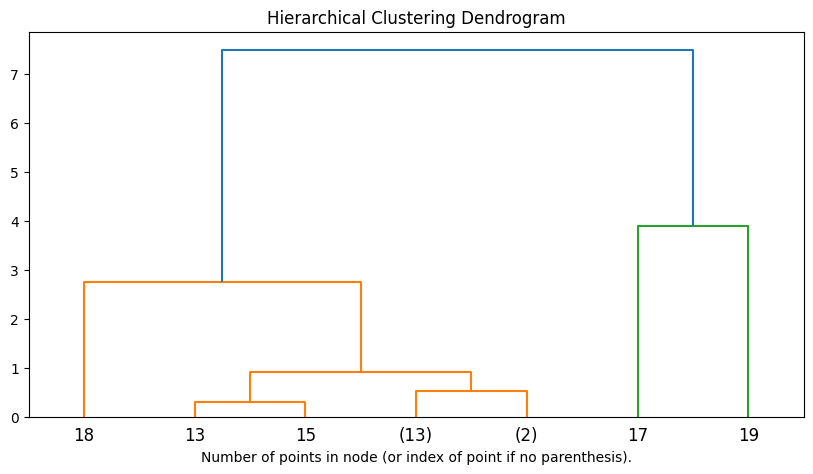

In [110]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
x_2_s = sc.fit_transform(X_2)
model = AgglomerativeClustering(distance_threshold=0 , n_clusters=None)
model.fit(x_2_s)
fig_hir , ax_hir = plt.subplots(figsize = (10,5))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

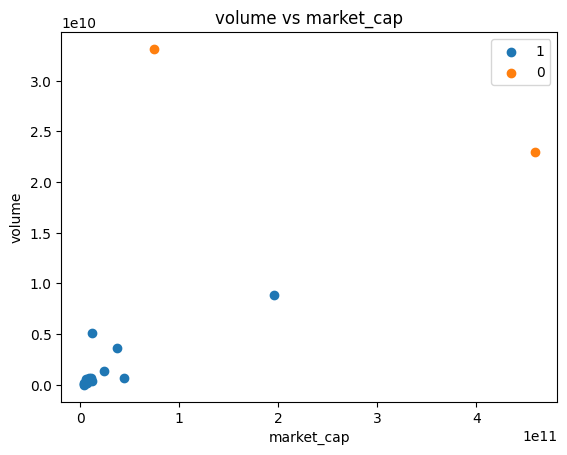

In [111]:
x_2_s = sc.fit_transform(X_2)
model_hir = AgglomerativeClustering(n_clusters=2)
y_pred_hir = model_hir.fit_predict(x_2_s)
clusters_hir = list(pd.Series(y_pred_hir).unique())
for i in range(len(clusters_hir)) :
    msk = y_pred_hir == clusters_hir[i]
    cluster = X_2[msk]
    plt.scatter(cluster[:,0] , cluster[:,1] , label = clusters_hir[i])
plt.xlabel("market_cap")
plt.ylabel("volume")
plt.title("volume vs market_cap")
plt.legend()
plt.show()

In [142]:
df_2['PTencode'] = le.fit_transform(df_2['ProofType'])
X_2_2 = np.asanyarray(df_2[['MarketCap' , 'Volume' , 'PTencode']])
x_2_2_s = sc.fit_transform(X_2_2)

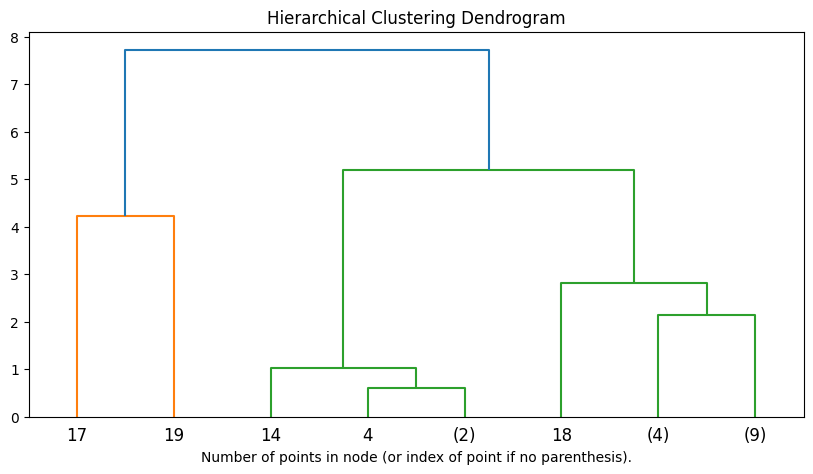

In [127]:
model.fit(x_2_2_s)
fig_hir_2 , ax_hir_2 = plt.subplots(figsize = (10,5))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [130]:
import plotly.graph_objects as go
y_pred_hir_2 = model_hir.fit_predict(x_2_2_s)
fig = go.Figure(data =[go.Scatter3d(x = df_2['MarketCap'], 
                                   y = df_2['Volume'], 
                                   z = df_2['ProofType'], 
                                   mode ='markers' , 
                                   marker = dict( 
                                     size = 12, 
                                     color = y_pred_hir_2, 
                                     colorscale ='Viridis', 
                                     opacity = 0.8
                                   )  ) ]) 
fig.show()

In [131]:
# در حالت قبلی ، دو نقطه که از نظر ارزش بازار و حجم ، بیشترین بودند ، در دسته جداگانه قرار گرفتند . در حالت جدید
# هم که از سه ویژگی برای دسته بندی استفاده کردیم ، مجددا همان اتفاق افتاد .

# Q3

In [143]:
import re
def get_number(x) : 
    if ',' in x : 
        x = x.replace("," , "")
    if '.' in x : 
        index = x.index(".")
        x = x[:index]
    return int(x)
df_2['NetworkEncode'] = le.fit_transform(df_2['Network'])
df_2['TotalSupply'] = df_2['TotalSupply'].apply(get_number)

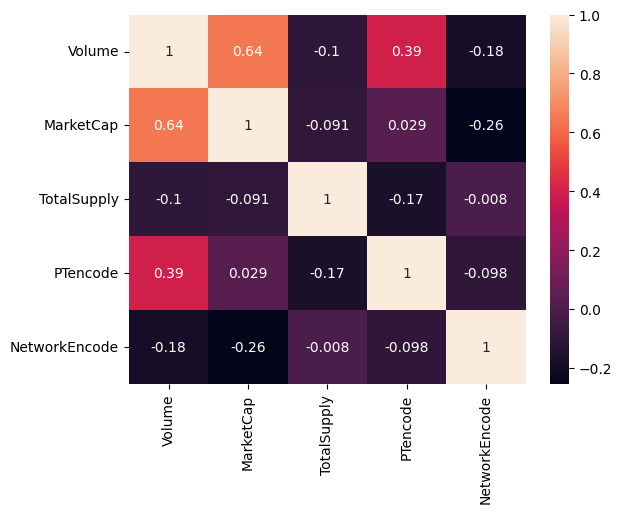

In [145]:
import seaborn as sns
sns.heatmap(df_2.corr() , annot=True)
plt.show()

In [146]:
x_2_3 = np.asanyarray(df_2.drop(['ProofType' , 'Network' , 'Symbol'] , axis = 1 ))
x_2_3_s = sc.fit_transform(x_2_3)

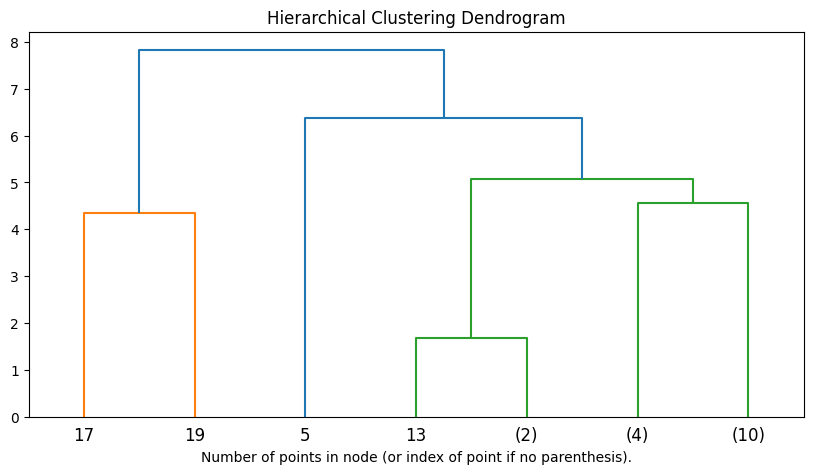

In [147]:
model.fit(x_2_3_s)
fig_hir_3 , ax_hir_3 = plt.subplots(figsize = (10,5))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [148]:
y_pred_hir_3 = model.fit_predict(x_2_3_s)
fig_3 = go.Figure(data =[go.Scatter3d(x = df_2['MarketCap'], 
                                   y = df_2['Volume'], 
                                   z = df_2['ProofType'], 
                                   mode ='markers' , 
                                   marker = dict( 
                                     size = 12, 
                                     color = y_pred_hir_3, 
                                     colorscale ='Viridis', 
                                     opacity = 0.8
                                   )  ) ]) 
fig_3.show()

In [150]:
import yfinance as yf
xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers = "XMR-USD",
period = "max",
interval = "1d")
df_xmr.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000


In [160]:
btc = yf.Ticker("BTC-USD")
df_btc = yf.download(tickers = "BTC-USD" , start = "2017-11-09" , interval = "1d")

df_btc.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920


In [176]:
etherium = yf.Ticker("ETH-USD")
df_ether = yf.download(tickers = "ETH-USD" , period = "max" , interval = "1d")
print(len(df_ether))
df_ether.head()

[*********************100%%**********************]  1 of 1 completed
2310


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [175]:
bnb = yf.Ticker("BNB-USD")
df_bnb = yf.download(tickers = "BNB-USD" , period = "max" , interval = "1d")
print(len(df_bnb))
df_bnb.head()

[*********************100%%**********************]  1 of 1 completed
2310


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


In [173]:
gold = yf.Ticker("GC=F")
df_gold = yf.download(tickers = "GC=F" , start = "2017-11-09"  , interval = "1d")
print(len(df_gold))
df_gold.head()

[*********************100%%**********************]  1 of 1 completed
1590


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,1279.699951,1286.900024,1279.699951,1285.599976,1285.599976,18
2017-11-10,1283.500000,1283.500000,1272.400024,1272.400024,1272.400024,10
2017-11-13,1277.300049,1277.300049,1277.000000,1277.300049,1277.300049,3
2017-11-14,1276.900024,1281.500000,1276.900024,1281.500000,1281.500000,4
2017-11-15,1281.400024,1284.699951,1275.900024,1276.500000,1276.500000,13


In [171]:
silver = yf.Ticker("SI=F")
df_silver = yf.download(tickers = "SI=F" , start = "2017-11-09" , interval = "1d")
print(len(df_silver))
df_silver.head()

[*********************100%%**********************]  1 of 1 completed
1588


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,16.930000,16.943001,16.930000,16.943001,16.943001,2
2017-11-10,17.000000,17.000000,16.844000,16.844000,16.844000,1
2017-11-13,16.840000,17.023001,16.840000,17.023001,17.023001,3
2017-11-14,16.905001,17.052000,16.905001,17.052000,17.052000,1
2017-11-15,16.950001,16.950001,16.940001,16.950001,16.950001,1


In [172]:
copper = yf.Ticker("HG=F")
df_copper = yf.download(tickers = "HG=F" , start = "2017-11-09" , interval = "1d")
print(len(df_copper))
df_copper.head()

[*********************100%%**********************]  1 of 1 completed
1589


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,3.0775,3.0855,3.0770,3.0800,3.0800,222
2017-11-10,3.0790,3.0790,3.0635,3.0695,3.0695,214
2017-11-13,3.0860,3.1260,3.0860,3.1115,3.1115,368
2017-11-14,3.1030,3.1030,3.0450,3.0600,3.0600,289
2017-11-15,3.0505,3.0575,3.0335,3.0490,3.0490,338


In [226]:
def get_all(max_day , start , end) : 
    res_X = []
    res_Y = []
    start_number = list(df_xmr.index.astype('str')).index(start)
    end_number = list(df_xmr.index.astype('str')).index(end)
    for i in range(1,max_day+1) : 
        j = i + start_number + 1
        train = []
        last_gold = None
        last_silver = None
        last_copper = None
        X = []
        Y = []
        cont = False
        while not cont :
            # i 
            # روز قبلی رو به عنوان یک ورودی ذخیره میکنه
            inp = []
            for k in range(i,-1,-1): 
                # اضافه کردن دیتاهای مربوط به ارزها
                index = df_xmr.index[j-k]
                #last_index = df_xmr.index[j-k-1]
                row_xmr = list(df_xmr.loc[index].values)
                row_btc = list(df_btc.loc[index].values)
                row_ether = list(df_ether.loc[index].values)
                row_bnb = list(df_bnb.loc[index].values)
                row_gold = ""
                row_silver = ""
                row_copper = ""
                # اضافه کردن دیتاهای مربوط به طلا و نقره و مس
                if index in list(df_gold.index) : 
                    row_gold = list(df_gold.loc[index].values)
                    last_gold = index
                else : 
                    row_gold = list(df_gold.loc[last_gold].values)

                if index in list(df_silver.index) : 
                    row_silver = list(df_silver.loc[index].values)
                    last_silver = index
                else : 
                    row_silver = list(df_silver.loc[last_silver].values)

                if index in list(df_copper.index) : 
                    row_copper = list(df_copper.loc[index].values)
                    last_copper = index
                else : 
                    row_copper = list(df_copper.loc[last_copper].values)

                
                #print(f"xmr:{row_xmr} , ether:{row_ether} , bnb : {row_bnb}  , gold : {row_gold} , silver : {row_silver} , copper : {row_copper}")
                row_final = row_xmr + row_btc + row_ether + row_bnb + row_gold + row_silver + row_copper
                #print(row_final , "\n------------------------------")
                inp.append(row_final)
            X.append(inp)
            row_y = ( df_xmr.loc[df_xmr.index[j+1]]['Close'] - df_xmr.loc[df_xmr.index[j]]['Close'] ) > 0
            Y.append(row_y)
            if list(df_xmr.index.astype('str'))[j] == end : 
                cont = True
            j += 1 
        res_X.append(X)
        res_Y.append(Y)
    return res_X , res_Y

In [282]:
def make_data_all(day , start , end) : 
    start_number = list(df_xmr.index.astype('str')).index(start)
    end_number = list(df_xmr.index.astype('str')).index(end)
    j = day + start_number + 1 
    last_gold = df_gold.index[1]
    last_last_gold = df_gold.index[0]
    last_silver = df_silver.index[1]
    last_last_silver = df_silver.index[0]
    last_copper = df_copper.index[1]
    last_last_copper = df_copper.index[0]
    X = []
    Y = []
    cont = False
    while not cont :
        # i 
        # روز قبلی رو به عنوان یک ورودی ذخیره میکنه
        inp = []
        for k in range(i,-1,-1): 
            # اضافه کردن دیتاهای مربوط به ارزها
            index = df_xmr.index[j-k]
            last_index = df_xmr.index[j-k-1]
            #print(index , last_index)
            row_xmr = (df_xmr.loc[index]["Close"] - df_xmr.loc[last_index]["Close"]) > 0 
            row_btc = (df_btc.loc[index]["Close"] - df_btc.loc[last_index]["Close"]) > 0 
            row_ether = (df_ether.loc[index]["Close"] - df_ether.loc[last_index]["Close"]) > 0
            row_bnb = (df_bnb.loc[index]["Close"] - df_bnb.loc[last_index]["Close"]) > 0 
            row_gold = ""
            row_silver = ""
            row_copper = ""
            # اضافه کردن دیتاهای مربوط به طلا و نقره و مس
            if (index in list(df_gold.index)) and (last_index in list(df_gold.index)) : 
                row_gold = (df_gold.loc[index]["Close"] - df_gold.loc[last_index]["Close"]) > 0
                last_gold = index
                last_last_gold = last_index
            else : 
                row_gold = (df_gold.loc[last_gold]["Close"] - df_gold.loc[last_last_gold]["Close"]) > 0

            if (index in list(df_silver.index)) and (last_index in list(df_silver.index)) : 
                row_silver = (df_silver.loc[index]["Close"] - df_silver.loc[last_index]["Close"]) > 0
                last_silver = index
                last_last_silver = last_index
            else : 
                row_silver = (df_silver.loc[last_silver]["Close"] - df_silver.loc[last_last_silver]["Close"]) > 0 

            if (index in list(df_copper.index)) and (last_index in list(df_copper.index)) : 
                row_copper = (df_copper.loc[index]["Close"] - df_copper.loc[last_index]["Close"]) > 0 
                last_copper = index
                last_last_copper = last_index
            else : 
                row_copper = (df_copper.loc[last_copper]["Close"] - df_copper.loc[last_last_copper]["Close"]) > 0

                
            #print(f"xmr:{row_xmr} , ether:{row_ether} , bnb : {row_bnb}  , gold : {row_gold} , silver : {row_silver} , copper : {row_copper}")
            row_final = [row_xmr , row_btc , row_ether , row_bnb , row_gold , row_silver , row_copper]
            #print(row_final , "\n------------------------------")
            inp.extend(row_final)
        X.append(inp)
        row_y = ( df_xmr.loc[df_xmr.index[j+1]]['Close'] - df_xmr.loc[df_xmr.index[j]]['Close'] ) > 0
        Y.append(row_y)
        if list(df_xmr.index.astype('str'))[j] == end : 
            cont = True
        j += 1 
    return X , Y 

In [258]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score , recall_score , precision_score , confusion_matrix , r2_score
def get_all_close(max_day , start , end) : 
    res_X = []
    start_number = list(df_xmr.index.astype('str')).index(start)
    end_number = list(df_xmr.index.astype('str')).index(end)
    for i in range(1,max_day+1) : 
        j = i + start_number + 1
        last_gold = None
        last_last_gold = None
        last_silver = None
        last_last_silver = None
        last_copper = None
        last_last_copper = None
        X = []
        Y = []
        cont = False
        while not cont :
            # i 
            # روز قبلی رو به عنوان یک ورودی ذخیره میکنه
            inp = []
            for k in range(i,-1,-1): 
                # اضافه کردن دیتاهای مربوط به ارزها
                index = df_xmr.index[j-k]
                last_index = df_xmr.index[j-k-1]
                row_xmr = (df_xmr.loc[index]["Close"] - df_xmr.loc[last_index]["Close"]) > 0 
                row_btc = (df_btc.loc[index]["Close"] - df_btc.loc[last_index]["Close"]) > 0 
                row_ether = (df_ether.loc[index]["Close"] - df_ether.loc[last_index]["Close"]) > 0
                row_bnb = (df_bnb.loc[index]["Close"] - df_bnb.loc[last_index]["Close"]) > 0 
                row_gold = ""
                row_silver = ""
                row_copper = ""
                # اضافه کردن دیتاهای مربوط به طلا و نقره و مس
                if (index in list(df_gold.index)) and (last_index in list(df_gold.index)) : 
                    row_gold = (df_gold.loc[index]["Close"] - df_gold.loc[last_index]["Close"]) > 0
                    last_gold = index
                    last_last_gold = last_index
                else : 
                    row_gold = (df_gold.loc[last_gold]["Close"] - df_gold.loc[last_last_gold]["Close"]) > 0

                if (index in list(df_silver.index)) and (last_index in list(df_silver.index)) : 
                    row_silver = (df_silver.loc[index]["Close"] - df_silver.loc[last_index]["Close"]) > 0
                    last_silver = index
                    last_last_silver = last_index
                else : 
                    row_silver = (df_silver.loc[last_silver]["Close"] - df_silver.loc[last_last_silver]["Close"]) > 0 

                if (index in list(df_copper.index)) and (last_index in list(df_copper.index)) : 
                    row_copper = (df_copper.loc[index]["Close"] - df_copper.loc[last_index]["Close"]) > 0 
                    last_copper = index
                    last_last_copper = last_index
                else : 
                    row_copper = (df_copper.loc[last_copper]["Close"] - df_copper.loc[last_last_copper]["Close"]) > 0

                
                #print(f"xmr:{row_xmr} , ether:{row_ether} , bnb : {row_bnb}  , gold : {row_gold} , silver : {row_silver} , copper : {row_copper}")
                row_final = [row_xmr , row_btc , row_ether , row_bnb , row_gold , row_silver , row_copper]
                #print(row_final , "\n------------------------------")
                inp.append(row_final)
            X.append(inp)
            row_y = ( df_xmr.loc[df_xmr.index[j+1]]['Close'] - df_xmr.loc[df_xmr.index[j]]['Close'] ) > 0
            Y.append(row_y)
            if list(df_xmr.index.astype('str'))[j] == end : 
                cont = True
            j += 1 
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X,Y)
        knn.
        res_X.append(X)
    return res_X

In [260]:
res_x_close , res_y_close = get_all_close(15,"2017-11-09" , "2017-11-29")

In [287]:
from sklearn.metrics import f1_score , r2_score , precision_score , recall_score , confusion_matrix
def get_metrics(y_true_in , y_pred_in , name ): 
    f1 = f1_score(y_true= y_true_in , y_pred = y_pred_in)
    recall = recall_score(y_true = y_true_in , y_pred= y_pred_in)
    prec = precision_score(y_true = y_true_in , y_pred = y_pred_in)
    matrix = confusion_matrix(y_true = y_true_in , y_pred = y_pred_in)
    print(f"for {name}:\nf1 score : {f1:.2f}  recall score : {recall:.2f}  \nprecision score : {prec:.2f}  confusion matrix : \n{matrix} ")
    return f1 , recall , prec

In [288]:
from sklearn.neighbors import KNeighborsClassifier
f1_train_s = []
recall_train_s = []
prec_train_s = []
f1_val_s = []
recall_val_s = []
prec_val_s = []
max_day = 14
for i in range(1,max_day) : 
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    start_train = "2017-11-09"
    end_train = "2023-08-08"
    x_train , y_train = make_data_all(day = i , start= start_train , end = end_train)
    start_val = list(df_xmr.index.astype("str"))[(list(df_xmr.index.astype("str")).index(end_train)-i)]
    end_val = "2023-09-07"
    x_val , y_val = make_data_all(day=i , start = start_val , end = end_val )
    start_test = list(df_xmr.index.astype("str"))[(list(df_xmr.index.astype("str")).index(end_val)-i)]
    end_test = "2023-10-07"
    x_test , y_test = make_data_all(day=i , start=start_test , end=end_test)
    knn.fit(x_train , y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_val = knn.predict(x_val)
    y_pred_test = knn.predict(x_test)
    f1_train , rec_train , prec_train = get_metrics(y_true_in= y_train , y_pred_in = y_pred_train , name="train")
    f1_val , rec_val , prec_val = get_metrics(y_true_in = y_val , y_pred_in = y_pred_val , name = "validation")
    f1_train_s.append(f1_train)
    recall_train_s.append(rec_train)
    prec_train_s.append(prec_train)
    f1_val_s.append(f1_val)
    recall_val_s.append(rec_val)
    prec_val_s.append(prec_val)

1
for train:
f1 score : 0.79  recall score : 0.75  
precision score : 0.82  confusion matrix : 
[[824 177]
 [273 823]] 
for validation:
f1 score : 0.42  recall score : 0.39  
precision score : 0.47  confusion matrix : 
[[ 4  8]
 [11  7]] 
2
for train:
f1 score : 0.67  recall score : 0.50  
precision score : 0.98  confusion matrix : 
[[991  10]
 [544 551]] 
for validation:
f1 score : 0.47  recall score : 0.39  
precision score : 0.58  confusion matrix : 
[[ 7  5]
 [11  7]] 
3
for train:
f1 score : 0.77  recall score : 0.77  
precision score : 0.77  confusion matrix : 
[[750 250]
 [255 840]] 
for validation:
f1 score : 0.53  recall score : 0.50  
precision score : 0.56  confusion matrix : 
[[5 7]
 [9 9]] 
4
for train:
f1 score : 0.66  recall score : 0.55  
precision score : 0.82  confusion matrix : 
[[868 131]
 [492 603]] 
for validation:
f1 score : 0.40  recall score : 0.33  
precision score : 0.50  confusion matrix : 
[[ 6  6]
 [12  6]] 
5
for train:
f1 score : 0.73  recall score : 0.7

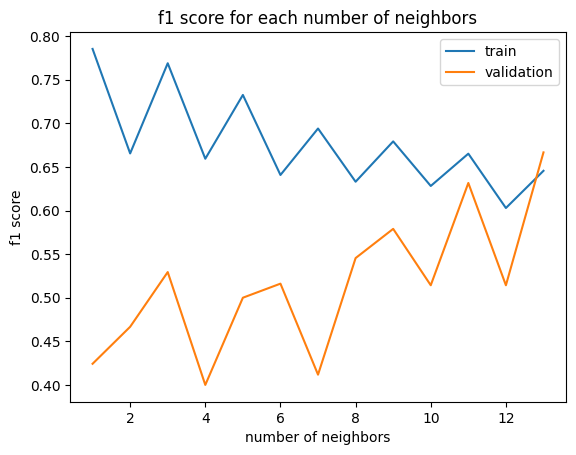

In [290]:
plt.plot([i for i in range(1,max_day)] , f1_train_s , label = "train")
plt.plot([i for i in range(1,max_day)] , f1_val_s , label = "validation")
plt.xlabel("number of neighbors")
plt.ylabel("f1 score")
plt.legend()
plt.title("f1 score for each number of neighbors")
plt.show()

In [296]:
def train_val(model , f1_train_s , recall_train_s , prec_train_s , f1_val_s , recall_val_s , prec_val_s , x_train , y_train , x_val , y_val) : 
    model.fit(x_train , y_train)
    y_pred_train = model.predict(x_train)
    y_pred_train = y_pred_train > 0
    y_pred_val = model.predict(x_val)
    y_pred_val = y_pred_val > 0
    f1_train , recall_train , prec_train = get_metrics(y_true_in=y_train , y_pred_in = y_pred_train , name = "train")
    f1_val , recall_val , prec_val = get_metrics(y_true_in=y_val , y_pred_in = y_pred_val , name = "validation")
    f1_train_s.append(f1_train)
    recall_train_s.append(recall_train)
    prec_train_s.append(prec_train)
    f1_val_s.append(f1_val)
    recall_val_s.append(recall_val)
    prec_val_s.append(prec_val)

In [298]:
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
## metrics for logreg
f1_train_s_log = []
recall_train_s_log = []
prec_train_s_log = []
f1_val_s_log = []
recall_val_s_log = []
prec_val_s_log = []
## metrics for linear
f1_train_s_line = []
recall_train_s_line = []
prec_train_s_line = []
f1_val_s_line = []
recall_val_s_line = []
prec_val_s_line = []
## metrics for svm
f1_train_s_svm = []
recall_train_s_svm = []
prec_train_s_svm = []
f1_val_s_svm = []
recall_val_s_svm = []
prec_val_s_svm = []
## metrics for bayes
f1_train_s_bayes = []
recall_train_s_bayes = []
prec_train_s_bayes = []
f1_val_s_bayes = []
recall_val_s_bayes = []
prec_val_s_bayes = []
for i in range(1,max_day) : 
    print(i)
    log_reg = LogisticRegression()
    linear = LinearRegression()
    svm = SVC()
    bayes = GaussianNB()
    start_train = "2017-11-09"
    end_train = "2023-08-08"
    x_train , y_train = make_data_all(day = i , start= start_train , end = end_train)
    start_val = list(df_xmr.index.astype("str"))[(list(df_xmr.index.astype("str")).index(end_train)-i)]
    end_val = "2023-09-07"
    x_val , y_val = make_data_all(day=i , start = start_val , end = end_val )
    start_test = list(df_xmr.index.astype("str"))[(list(df_xmr.index.astype("str")).index(end_val)-i)]
    end_test = "2023-10-07"
    x_test , y_test = make_data_all(day=i , start=start_test , end=end_test)
    print("** logistic regression :")
    train_val(log_reg , f1_train_s_log , recall_train_s_log , prec_train_s_log , 
              f1_val_s_log , recall_val_s_log , prec_val_s_log , x_train , y_train , x_val , y_val )
    ##############################################
    print("** linear regression :")
    train_val(linear , f1_train_s_line , recall_train_s_line ,prec_train_s_line , f1_val_s_line ,
    recall_val_s_line , prec_val_s_line , x_train , y_train , x_val , y_val)
    #############################################
    print("** svm :")
    train_val(svm , f1_train_s_svm , recall_train_s_svm  ,prec_train_s_svm ,f1_val_s_svm ,
              recall_val_s_svm , prec_val_s_svm , x_train , y_train , x_val , y_val )
    #############################################
    print("** gaussion bayes :")
    train_val(bayes , f1_train_s_bayes , recall_train_s_bayes , prec_train_s_bayes , f1_val_s_bayes ,
              recall_val_s_bayes , prec_val_s_bayes , x_train , y_train , x_val , y_val )
    #############################################
    print("***********************************************************")

1
** logistic regression :
for train:
f1 score : 0.59  recall score : 0.62  
precision score : 0.57  confusion matrix : 
[[484 517]
 [415 681]] 
for validation:
f1 score : 0.51  recall score : 0.50  
precision score : 0.53  confusion matrix : 
[[4 8]
 [9 9]] 
** linear regression :
for train:
f1 score : 0.69  recall score : 1.00  
precision score : 0.52  confusion matrix : 
[[   0 1001]
 [   0 1096]] 
for validation:
f1 score : 0.75  recall score : 1.00  
precision score : 0.60  confusion matrix : 
[[ 0 12]
 [ 0 18]] 
** svm :
for train:
f1 score : 0.70  recall score : 0.74  
precision score : 0.66  confusion matrix : 
[[579 422]
 [284 812]] 
for validation:
f1 score : 0.41  recall score : 0.39  
precision score : 0.44  confusion matrix : 
[[ 3  9]
 [11  7]] 
** gaussion bayes :
for train:
f1 score : 0.57  recall score : 0.59  
precision score : 0.56  confusion matrix : 
[[497 504]
 [451 645]] 
for validation:
f1 score : 0.61  recall score : 0.61  
precision score : 0.61  confusion mat

** logistic regression :
for train:
f1 score : 0.62  recall score : 0.67  
precision score : 0.58  confusion matrix : 
[[479 517]
 [365 728]] 
for validation:
f1 score : 0.45  recall score : 0.39  
precision score : 0.54  confusion matrix : 
[[ 6  6]
 [11  7]] 
** linear regression :
for train:
f1 score : 0.69  recall score : 1.00  
precision score : 0.52  confusion matrix : 
[[   0  996]
 [   0 1093]] 
for validation:
f1 score : 0.75  recall score : 1.00  
precision score : 0.60  confusion matrix : 
[[ 0 12]
 [ 0 18]] 
** svm :
for train:
f1 score : 0.87  recall score : 0.91  
precision score : 0.83  confusion matrix : 
[[ 794  202]
 [  93 1000]] 
for validation:
f1 score : 0.59  recall score : 0.61  
precision score : 0.58  confusion matrix : 
[[ 4  8]
 [ 7 11]] 
** gaussion bayes :
for train:
f1 score : 0.60  recall score : 0.61  
precision score : 0.58  confusion matrix : 
[[520 476]
 [424 669]] 
for validation:
f1 score : 0.34  recall score : 0.28  
precision score : 0.45  confusi

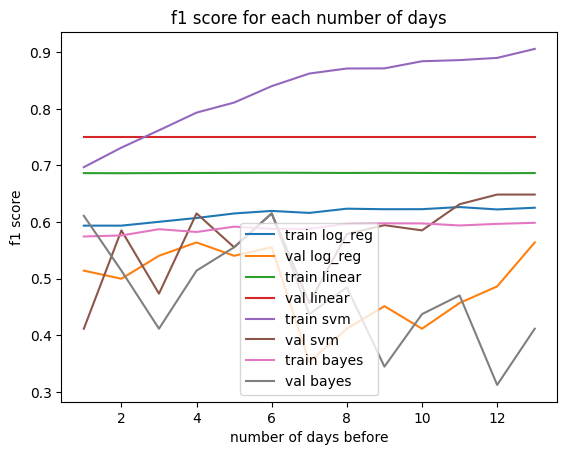

In [299]:
plt.plot([i for i in range(1,max_day)] , f1_train_s_log , label = "train log_reg")
plt.plot([i for i in range(1,max_day)] , f1_val_s_log , label = "val log_reg")
plt.plot([i for i in range(1,max_day)] , f1_train_s_line , label = "train linear")
plt.plot([i for i in range(1,max_day)] , f1_val_s_line , label = "val linear")
plt.plot([i for i in range(1,max_day)] , f1_train_s_svm , label = "train svm")
plt.plot([i for i in range(1,max_day)] , f1_val_s_svm , label = "val svm")
plt.plot([i for i in range(1,max_day)] , f1_train_s_bayes , label = "train bayes")
plt.plot([i for i in range(1,max_day)] , f1_val_s_bayes , label = "val bayes")
plt.xlabel("number of days before")
plt.ylabel("f1 score")
plt.title("f1 score for each number of days")
plt.legend()
plt.show()

In [300]:
from sklearn.ensemble import AdaBoostClassifier

for i in range(1,max_day) : 
    print(i)
    ada = AdaBoostClassifier(n_estimators=50)
    start_train = "2017-11-09"
    end_train = "2023-08-08"
    x_train , y_train = make_data_all(day = i , start= start_train , end = end_train)
    start_val = list(df_xmr.index.astype("str"))[(list(df_xmr.index.astype("str")).index(end_train)-i)]
    end_val = "2023-09-07"
    x_val , y_val = make_data_all(day=i , start = start_val , end = end_val )
    start_test = list(df_xmr.index.astype("str"))[(list(df_xmr.index.astype("str")).index(end_val)-i)]
    end_test = "2023-10-07"
    x_test , y_test = make_data_all(day=i , start=start_test , end=end_test)
    print("** Ada Boost :")
    train_val(ada , f1_train_s_log , recall_train_s_log , prec_train_s_log , 
              f1_val_s_log , recall_val_s_log , prec_val_s_log , x_train , y_train , x_val , y_val )

1
** Ada Boost :
for train:
f1 score : 0.60  recall score : 0.63  
precision score : 0.57  confusion matrix : 
[[469 532]
 [401 695]] 
for validation:
f1 score : 0.51  recall score : 0.50  
precision score : 0.53  confusion matrix : 
[[4 8]
 [9 9]] 
2
** Ada Boost :
for train:
f1 score : 0.59  recall score : 0.62  
precision score : 0.56  confusion matrix : 
[[476 525]
 [415 680]] 
for validation:
f1 score : 0.50  recall score : 0.50  
precision score : 0.50  confusion matrix : 
[[3 9]
 [9 9]] 
3
** Ada Boost :
for train:
f1 score : 0.60  recall score : 0.64  
precision score : 0.57  confusion matrix : 
[[465 535]
 [397 698]] 
for validation:
f1 score : 0.51  recall score : 0.50  
precision score : 0.53  confusion matrix : 
[[4 8]
 [9 9]] 
4
** Ada Boost :
for train:
f1 score : 0.60  recall score : 0.64  
precision score : 0.57  confusion matrix : 
[[462 537]
 [396 699]] 
for validation:
f1 score : 0.51  recall score : 0.50  
precision score : 0.53  confusion matrix : 
[[4 8]
 [9 9]] 


In [302]:
nn = len(f1_train_s_log)
print(nn)
mm = len(f1_train_s_line)
print(mm)

26
13


In [303]:
f1_train_s_ada = f1_train_s_log[13:]
recall_train_s_ada = recall_train_s_log[13:]
prec_train_s_ada = prec_train_s_log[13:]
f1_val_s_ada = f1_val_s_log[13:]
recall_val_s_ada = recall_val_s_log[13:]
prec_val_s_ada = prec_val_s_log[13:]

In [305]:
f1_train_s_log = f1_train_s_log[:13]
recall_train_s_log = recall_train_s_log[:13]
prec_train_s_log = prec_train_s_log[:13]
f1_val_s_log = f1_val_s_log[:13]
recall_val_s_log = recall_val_s_log[:13]
prec_val_s_log = prec_val_s_log[:13]

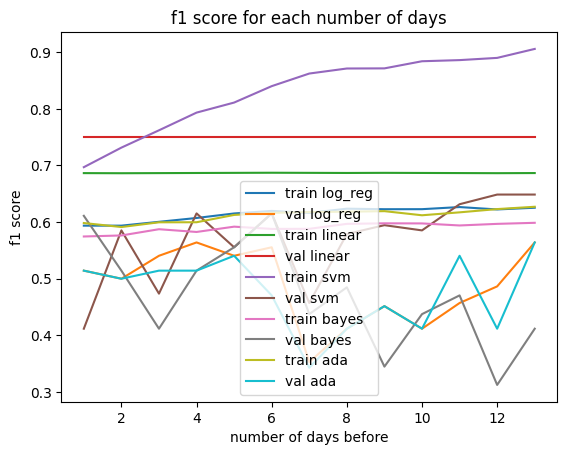

In [306]:
plt.plot([i for i in range(1,max_day)] , f1_train_s_log , label = "train log_reg")
plt.plot([i for i in range(1,max_day)] , f1_val_s_log , label = "val log_reg")
plt.plot([i for i in range(1,max_day)] , f1_train_s_line , label = "train linear")
plt.plot([i for i in range(1,max_day)] , f1_val_s_line , label = "val linear")
plt.plot([i for i in range(1,max_day)] , f1_train_s_svm , label = "train svm")
plt.plot([i for i in range(1,max_day)] , f1_val_s_svm , label = "val svm")
plt.plot([i for i in range(1,max_day)] , f1_train_s_bayes , label = "train bayes")
plt.plot([i for i in range(1,max_day)] , f1_val_s_bayes , label = "val bayes")
plt.plot([i for i in range(1,max_day)] , f1_train_s_ada , label = "train ada")
plt.plot([i for i in range(1,max_day)] , f1_val_s_ada , label = "val ada")
plt.xlabel("number of days before")
plt.ylabel("f1 score")
plt.title("f1 score for each number of days")
plt.legend()
plt.show()

In [307]:
# با توجه به نمودار های نمایش داده شده در بالا ، مشاهده میکنیم که دقت مدل بر روی دیتای اعتبار سنجی در مدل
# svm
# بیشتر هست . بنابر این ، مدل نهایی که بر روی داده تست اعمال میکنیم ، مدل
# svm
# خواهد بود .

In [308]:
def train_val_linear(model , f1_train_s , recall_train_s , prec_train_s , f1_val_s , recall_val_s , prec_val_s , x_train , y_train , x_val , y_val) : 
    model.fit(x_train , y_train)
    y_pred_train = model.predict(x_train)
    y_pred_train = y_pred_train > 0.5
    y_pred_val = model.predict(x_val)
    y_pred_val = y_pred_val > 0.5
    f1_train , recall_train , prec_train = get_metrics(y_true_in=y_train , y_pred_in = y_pred_train , name = "train")
    f1_val , recall_val , prec_val = get_metrics(y_true_in=y_val , y_pred_in = y_pred_val , name = "validation")
    f1_train_s.append(f1_train)
    recall_train_s.append(recall_train)
    prec_train_s.append(prec_train)
    f1_val_s.append(f1_val)
    recall_val_s.append(recall_val)
    prec_val_s.append(prec_val)

In [309]:
## new metrics for linear
new_f1_train_s_line = []
new_recall_train_s_line = []
new_prec_train_s_line = []
new_f1_val_s_line = []
new_recall_val_s_line = []
new_prec_val_s_line = []
for i in range(1,max_day) : 
    print(i)
    log_reg = LogisticRegression()
    linear = LinearRegression()
    svm = SVC()
    bayes = GaussianNB()
    start_train = "2017-11-09"
    end_train = "2023-08-08"
    x_train , y_train = make_data_all(day = i , start= start_train , end = end_train)
    start_val = list(df_xmr.index.astype("str"))[(list(df_xmr.index.astype("str")).index(end_train)-i)]
    end_val = "2023-09-07"
    x_val , y_val = make_data_all(day=i , start = start_val , end = end_val )
    start_test = list(df_xmr.index.astype("str"))[(list(df_xmr.index.astype("str")).index(end_val)-i)]
    end_test = "2023-10-07"
    x_test , y_test = make_data_all(day=i , start=start_test , end=end_test)
    print("** linear regression :")
    train_val_linear(linear , new_f1_train_s_line , new_recall_train_s_line , new_prec_train_s_line , 
              new_f1_val_s_line , new_recall_val_s_line , new_prec_val_s_line ,
              x_train , y_train , x_val , y_val)

1
** linear regression :
for train:
f1 score : 0.59  recall score : 0.62  
precision score : 0.57  confusion matrix : 
[[493 508]
 [421 675]] 
for validation:
f1 score : 0.51  recall score : 0.50  
precision score : 0.53  confusion matrix : 
[[4 8]
 [9 9]] 
2
** linear regression :
for train:
f1 score : 0.59  recall score : 0.62  
precision score : 0.57  confusion matrix : 
[[481 520]
 [416 679]] 
for validation:
f1 score : 0.50  recall score : 0.50  
precision score : 0.50  confusion matrix : 
[[3 9]
 [9 9]] 
3
** linear regression :
for train:
f1 score : 0.60  recall score : 0.64  
precision score : 0.57  confusion matrix : 
[[466 534]
 [397 698]] 
for validation:
f1 score : 0.54  recall score : 0.56  
precision score : 0.53  confusion matrix : 
[[ 3  9]
 [ 8 10]] 
4
** linear regression :
for train:
f1 score : 0.61  recall score : 0.65  
precision score : 0.57  confusion matrix : 
[[471 528]
 [388 707]] 
for validation:
f1 score : 0.56  recall score : 0.61  
precision score : 0.52  

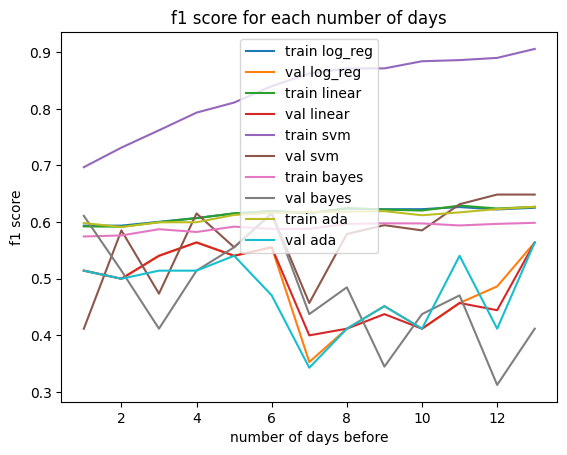

In [310]:
plt.plot([i for i in range(1,max_day)] , f1_train_s_log , label = "train log_reg")
plt.plot([i for i in range(1,max_day)] , f1_val_s_log , label = "val log_reg")
plt.plot([i for i in range(1,max_day)] , new_f1_train_s_line , label = "train linear")
plt.plot([i for i in range(1,max_day)] , new_f1_val_s_line , label = "val linear")
plt.plot([i for i in range(1,max_day)] , f1_train_s_svm , label = "train svm")
plt.plot([i for i in range(1,max_day)] , f1_val_s_svm , label = "val svm")
plt.plot([i for i in range(1,max_day)] , f1_train_s_bayes , label = "train bayes")
plt.plot([i for i in range(1,max_day)] , f1_val_s_bayes , label = "val bayes")
plt.plot([i for i in range(1,max_day)] , f1_train_s_ada , label = "train ada")
plt.plot([i for i in range(1,max_day)] , f1_val_s_ada , label = "val ada")
plt.xlabel("number of days before")
plt.ylabel("f1 score")
plt.title("f1 score for each number of days")
plt.legend()
plt.show()

In [312]:
best_day = 12
best_model = SVC()
start_train = "2017-11-09"
end_train = "2023-08-08"
x_train_final , y_train_final = make_data_all(day = best_day , start= start_train , end = end_train)
best_model.fit(x_train_final , y_train_final)
end_val = "2023-09-07"
start_test = list(df_xmr.index.astype("str"))[(list(df_xmr.index.astype("str")).index(end_val)-best_day)]
end_test = "2023-10-07"
x_test_final , y_test_final = make_data_all(day= best_day , start=start_test , end=end_test)
y_pred_final = best_model.predict(x_test_final)
f1_final , recall_final , prec_final = get_metrics(y_true_in = y_test_final , y_pred_in = y_pred_final , name="test")

for test:
f1 score : 0.61  recall score : 0.61  
precision score : 0.61  confusion matrix : 
[[ 5  7]
 [ 7 11]] 


In [313]:
# برای دیتای تست ، توانستیم به دقت 0.61 با استفاده از بهترین مدل آموزش داده شده برسیم. 